In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Anime dataset
anime_df=pd.read_csv("anime.csv")
# Load Rating dataset
rating_df=pd.read_csv("rating.csv")

In [4]:
# Handling missing values
anime_df.dropna(inplace=True)

In [5]:
# Convert 'genre' column to list of genres
anime_df['genre'] = anime_df['genre'].apply(lambda x: x.split(',') if isinstance(x, str) else x)

In [6]:
# Convert 'type' column to category
anime_df['type'] = anime_df['type'].astype('category')

In [7]:
# Handling missing values
rating_df['rating'].replace({-1: None}, inplace=True)

In [8]:
# Convert 'rating' column to numeric
rating_df['rating'] = pd.to_numeric(rating_df['rating'])

In [9]:
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic,...",TV,64,9.26,793665
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samur...",TV,51,9.25,114262
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24,9.17,673572
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samur...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,[Hentai],OVA,1,4.15,211
12290,5543,Under World,[Hentai],OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,[Hentai],OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,[Hentai],OVA,1,4.98,175


In [10]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic,...",TV,64,9.26,793665
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samur...",TV,51,9.25,114262
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24,9.17,673572
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samur...",TV,51,9.16,151266


In [11]:
rating_df

,user_id,anime_id,rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN
...,...,...,...
7813732,73515,16512,7.0
7813733,73515,17187,9.0
7813734,73515,22145,10.0
7813735,73516,790,9.0


In [12]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN


In [13]:
anime_df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

# Eda

In [14]:
# Display basic statistics and info
print(anime_df.describe())
print("\n\n\n")
print(anime_df.info())

           anime_id        rating       members
count  12017.000000  12017.000000  1.201700e+04
mean   13638.001165      6.478264  1.834888e+04
std    11231.076675      1.023857  5.537250e+04
min        1.000000      1.670000  1.200000e+01
25%     3391.000000      5.890000  2.250000e+02
50%     9959.000000      6.570000  1.552000e+03
75%    23729.000000      7.180000  9.588000e+03
max    34519.000000     10.000000  1.013917e+06




<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   anime_id  12017 non-null  int64   
 1   name      12017 non-null  object  
 2   genre     12017 non-null  object  
 3   type      12017 non-null  category
 4   episodes  12017 non-null  object  
 5   rating    12017 non-null  float64 
 6   members   12017 non-null  int64   
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 669.1+ KB
None


# data visualisation

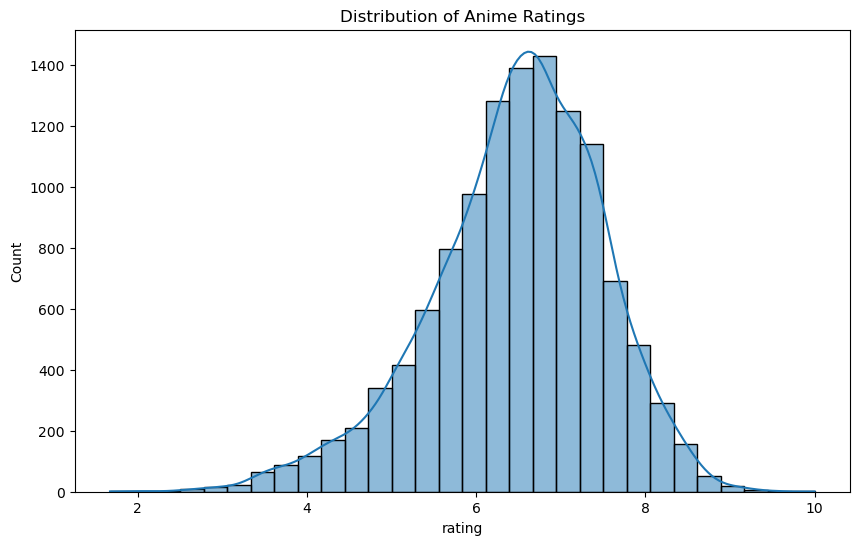

In [15]:
# Visualize distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['rating'], bins=30, kde=True)
plt.title('Distribution of Anime Ratings')
plt.show()

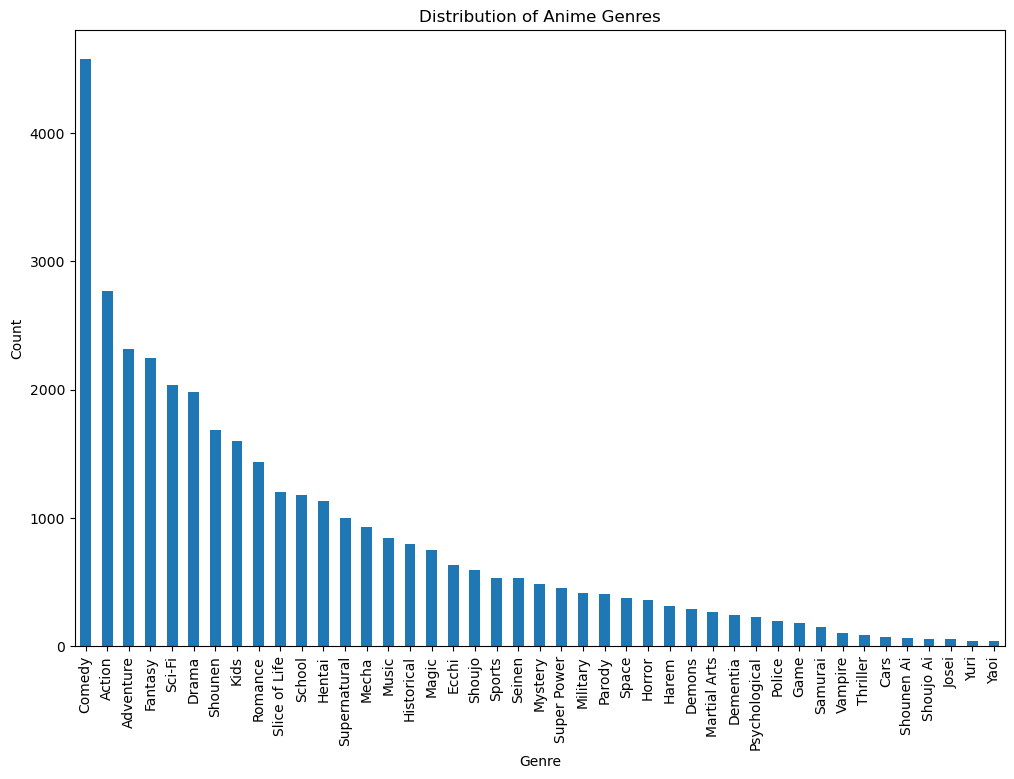

In [16]:
# Explore genre distribution
genre_counts = anime_df['genre'].explode().apply(lambda x: str(x).split(',')).explode().str.strip().value_counts()
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar')
plt.title('Distribution of Anime Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

# eda for rating dataset

In [17]:
# Display basic statistics and info
print(rating_df.describe())
print("\n\n")
print(rating_df.info())

            user_id      anime_id        rating
count  7.813737e+06  7.813737e+06  6.337241e+06
mean   3.672796e+04  8.909072e+03  7.808497e+00
std    2.099795e+04  8.883950e+03  1.572496e+00
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    1.897400e+04  1.240000e+03  7.000000e+00
50%    3.679100e+04  6.213000e+03  8.000000e+00
75%    5.475700e+04  1.409300e+04  9.000000e+00
max    7.351600e+04  3.451900e+04  1.000000e+01



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   anime_id  int64  
 2   rating    float64
dtypes: float64(1), int64(2)
memory usage: 178.8 MB
None


# data visualisation for rating

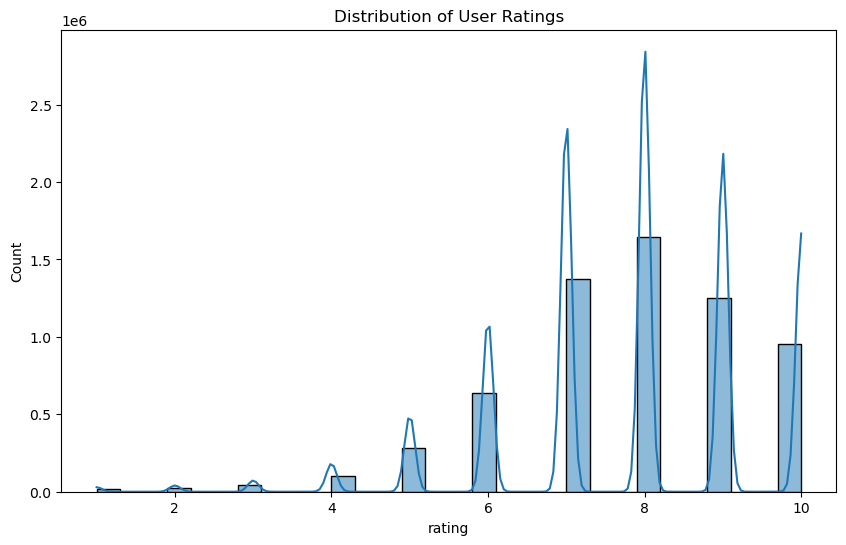

In [18]:
# Visualize distribution of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(rating_df['rating'], bins=30, kde=True)
plt.title('Distribution of User Ratings')
plt.show()

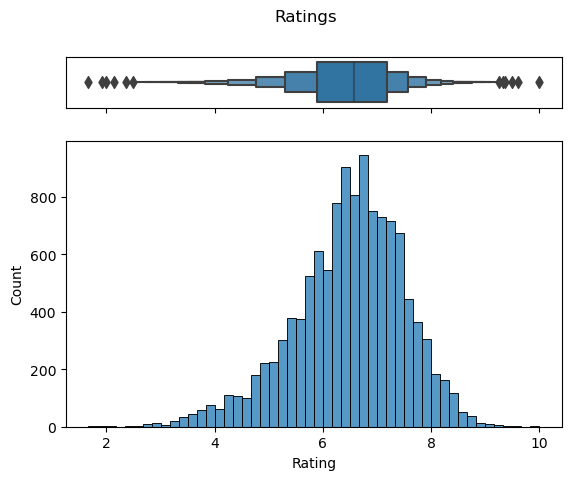

In [19]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# boxplot
f.suptitle("Ratings")
sns.boxenplot(data=anime_df, x="rating", ax=ax_box)
ax_box.set(yticks=[])
ax_box.set_xlabel("")
# histplot
sns.histplot(data=anime_df, x="rating", bins=50, ax=ax_hist)
ax_hist.set_xlabel("Rating")
plt.show()

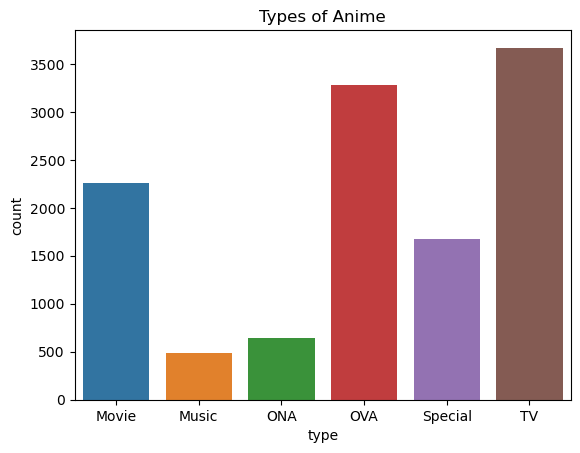

In [20]:
#type
ax = sns.countplot(data=anime_df, x='type')
ax.set(title="Types of Anime")
plt.show()

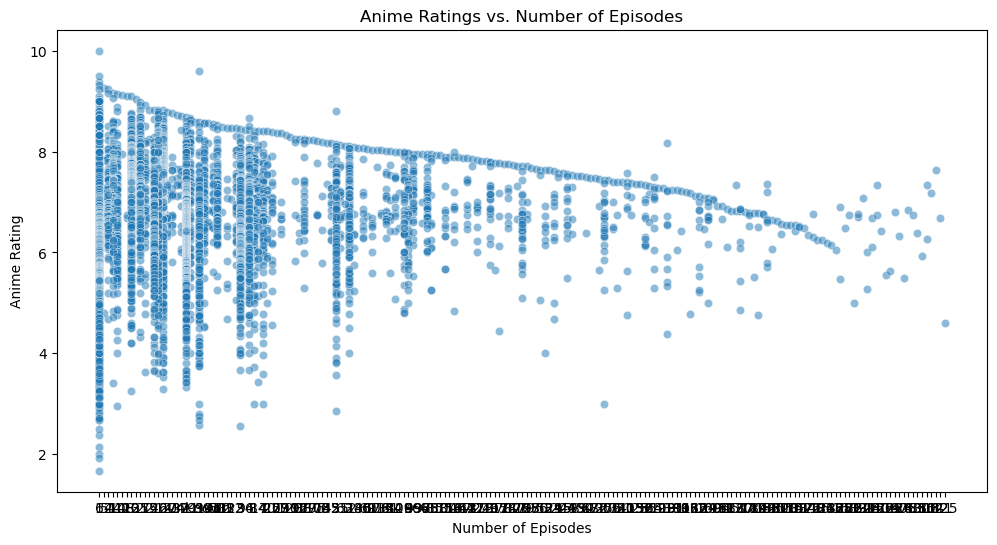

In [21]:
#Anime Ratings vs. Number of Episodes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='episodes', y='rating', data=anime_df, alpha=0.5)
plt.title('Anime Ratings vs. Number of Episodes')
plt.xlabel('Number of Episodes')
plt.ylabel('Anime Rating')
plt.show()

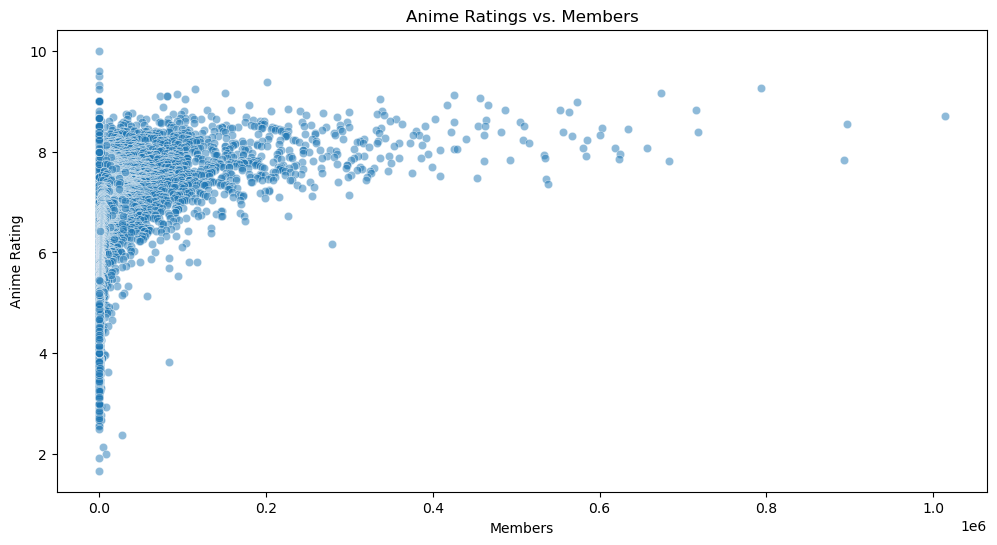

In [22]:
# Anime Ratings vs. Members
plt.figure(figsize=(12, 6))
sns.scatterplot(x='members', y='rating', data=anime_df, alpha=0.5)
plt.title('Anime Ratings vs. Members')
plt.xlabel('Members')
plt.ylabel('Anime Rating')
plt.show()

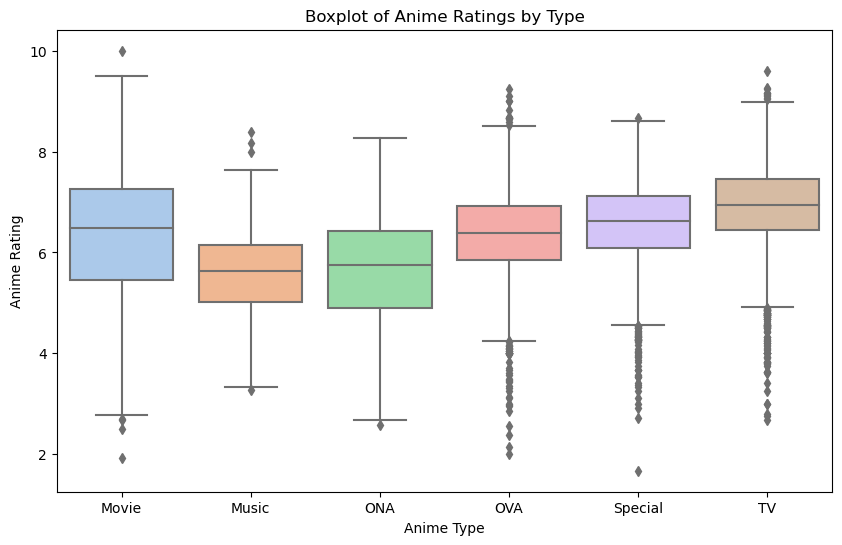

In [23]:
#Boxplot of Anime Ratings by type
plt.figure(figsize=(10,6))
sns.boxplot(x='type',y='rating',data=anime_df,palette='pastel')
plt.title('Boxplot of Anime Ratings by Type')
plt.xlabel('Anime Type')
plt.ylabel('Anime Rating')
plt.show()

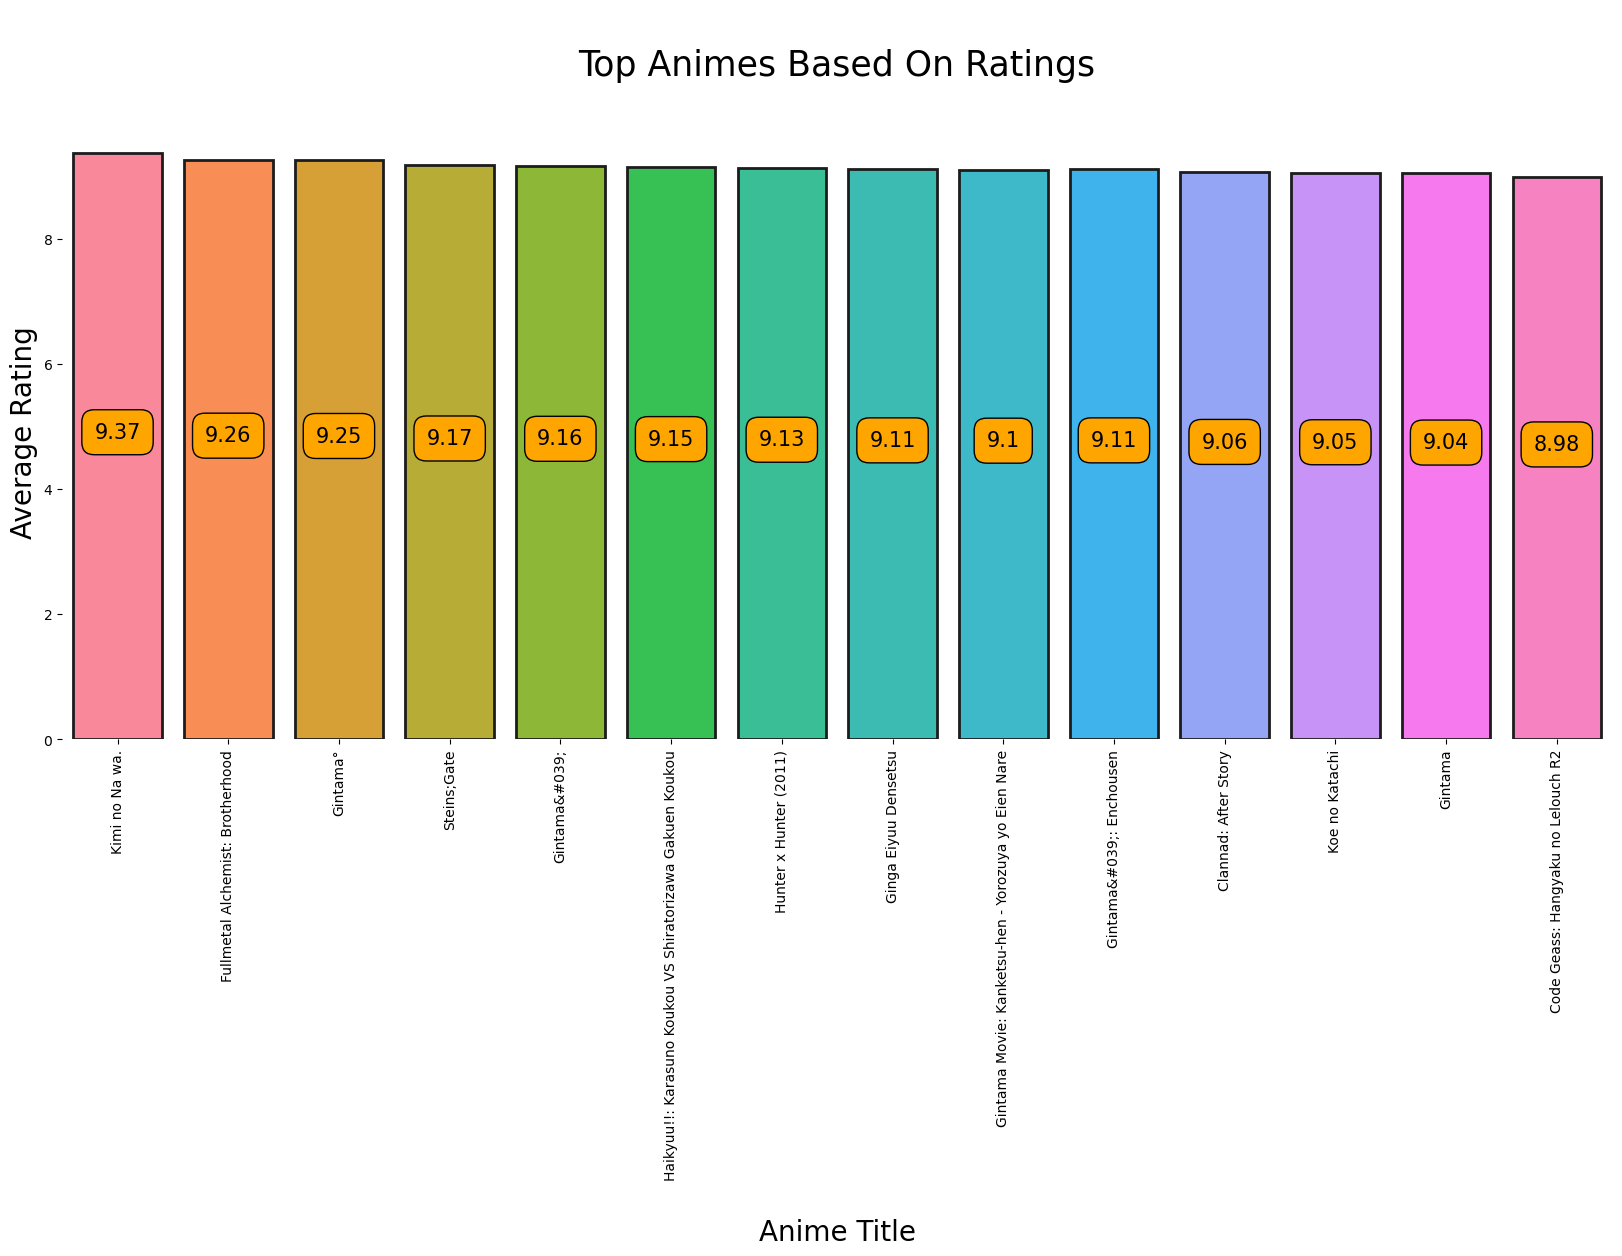

In [29]:
plt.subplots(figsize=(20,8))
p = sns.barplot(x=anime_df["name"][:14],y=anime_df["rating"], saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Animes Based On Ratings\n",fontsize = 25)
plt.ylabel("Average Rating",fontsize = 20)
plt.xlabel("\nAnime Title",fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 15,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

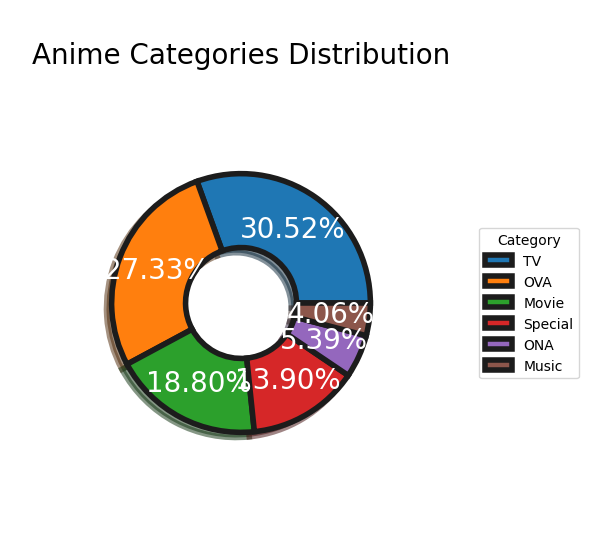

In [33]:
plt.subplots(figsize=(6, 6))
labels = "TV","OVA","Movie","Special","ONA","Music"
size = 0.4
wedges, texts, autotexts = plt.pie([len(anime_df[anime_df["type"]=="TV"]["type"]),
                                    len(anime_df[anime_df["type"]=="OVA"]["type"]),
                                    len(anime_df[anime_df["type"]=="Movie"]["type"]),
                                    len(anime_df[anime_df["type"]=="Special"]["type"]),
                                    len(anime_df[anime_df["type"]=="ONA"]["type"]),
                                    len(anime_df[anime_df["type"]=="Music"]["type"])],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.7, 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c", 
                                    linewidth = 4),
                                    startangle = 0)
plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nAnime Categories Distribution",fontsize=20)
plt.show()

# category wise anime rating distribution

Anime category TV

Let's explore the ratings distribution of TV category :



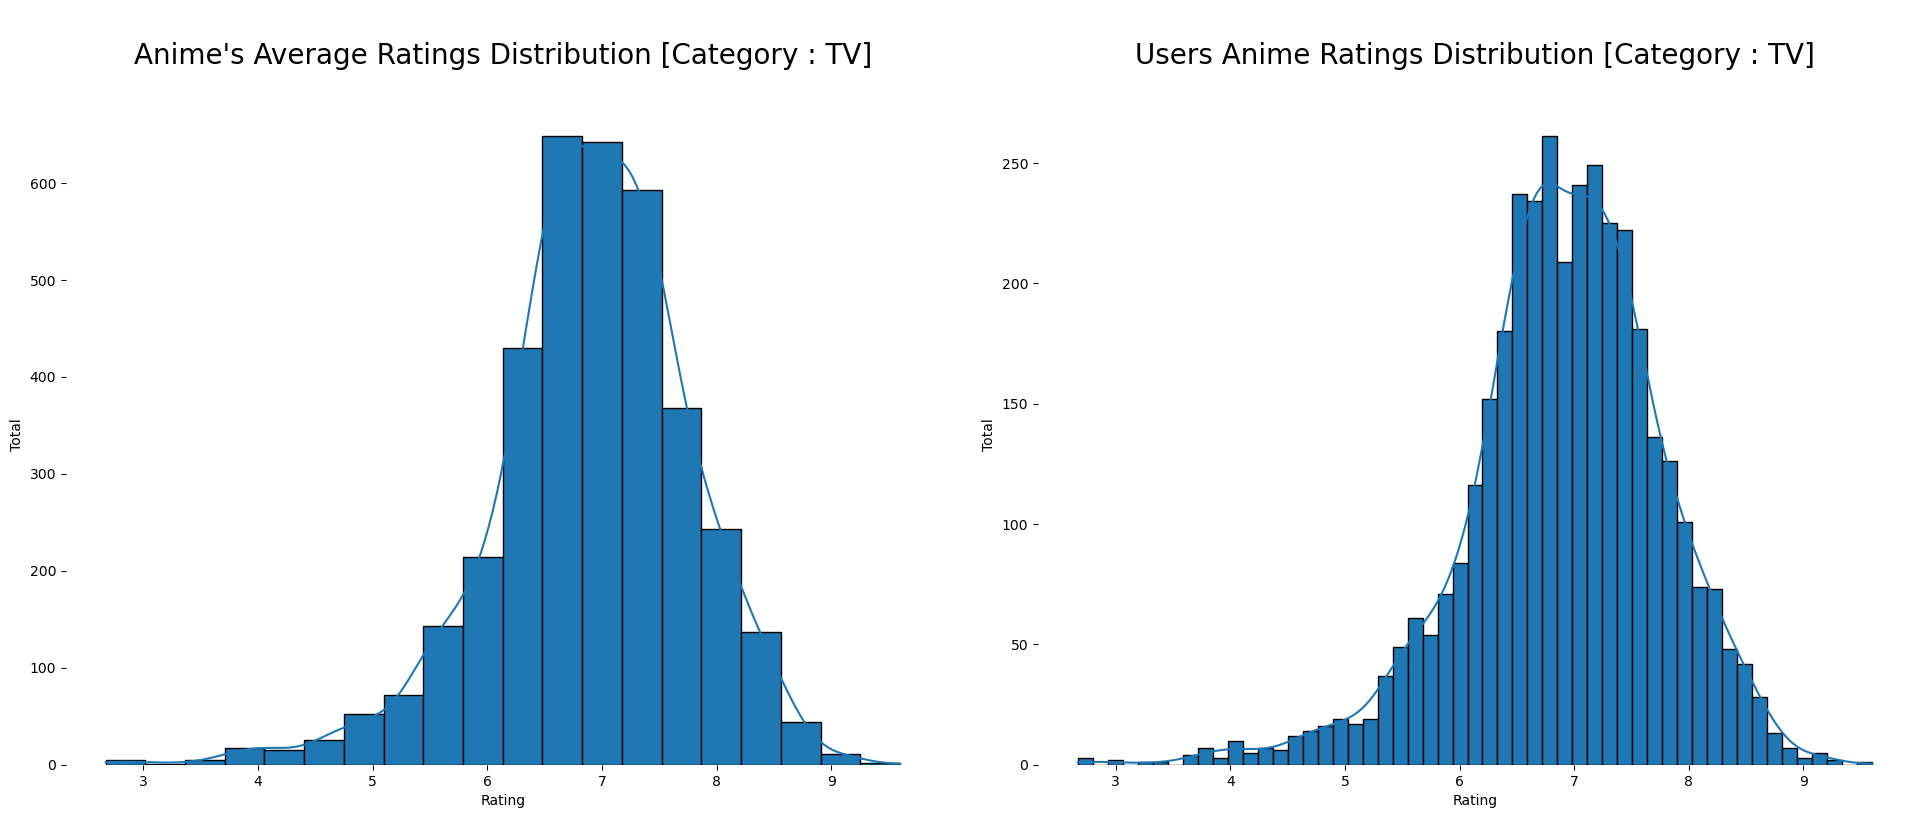

In [36]:
print("Let's explore the ratings distribution of TV category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(anime_df[anime_df["type"]=="TV"]["rating"],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)

axs[0].set_title("\nAnime's Average Ratings Distribution [Category : TV]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(anime_df[anime_df["type"]=="TV"]["rating"],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : TV]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

1. The majority of anime ratings fall within the range of 6.0 to 8.0, indicating that most anime receives moderate to above-average ratings from viewers.

2. Users' ratings of anime are distributed between 6.0 and 10.0, suggesting that users generally have a positive inclination when rating anime.

3. The mode, or the most frequently occurring range, of users' ratings distribution lies between 7.0 and 9.0. This implies that anime tends to receive higher ratings within this range, indicating a preference for above-average ratings among users.

4. Both the distribution are left skewed

Anime category OVA

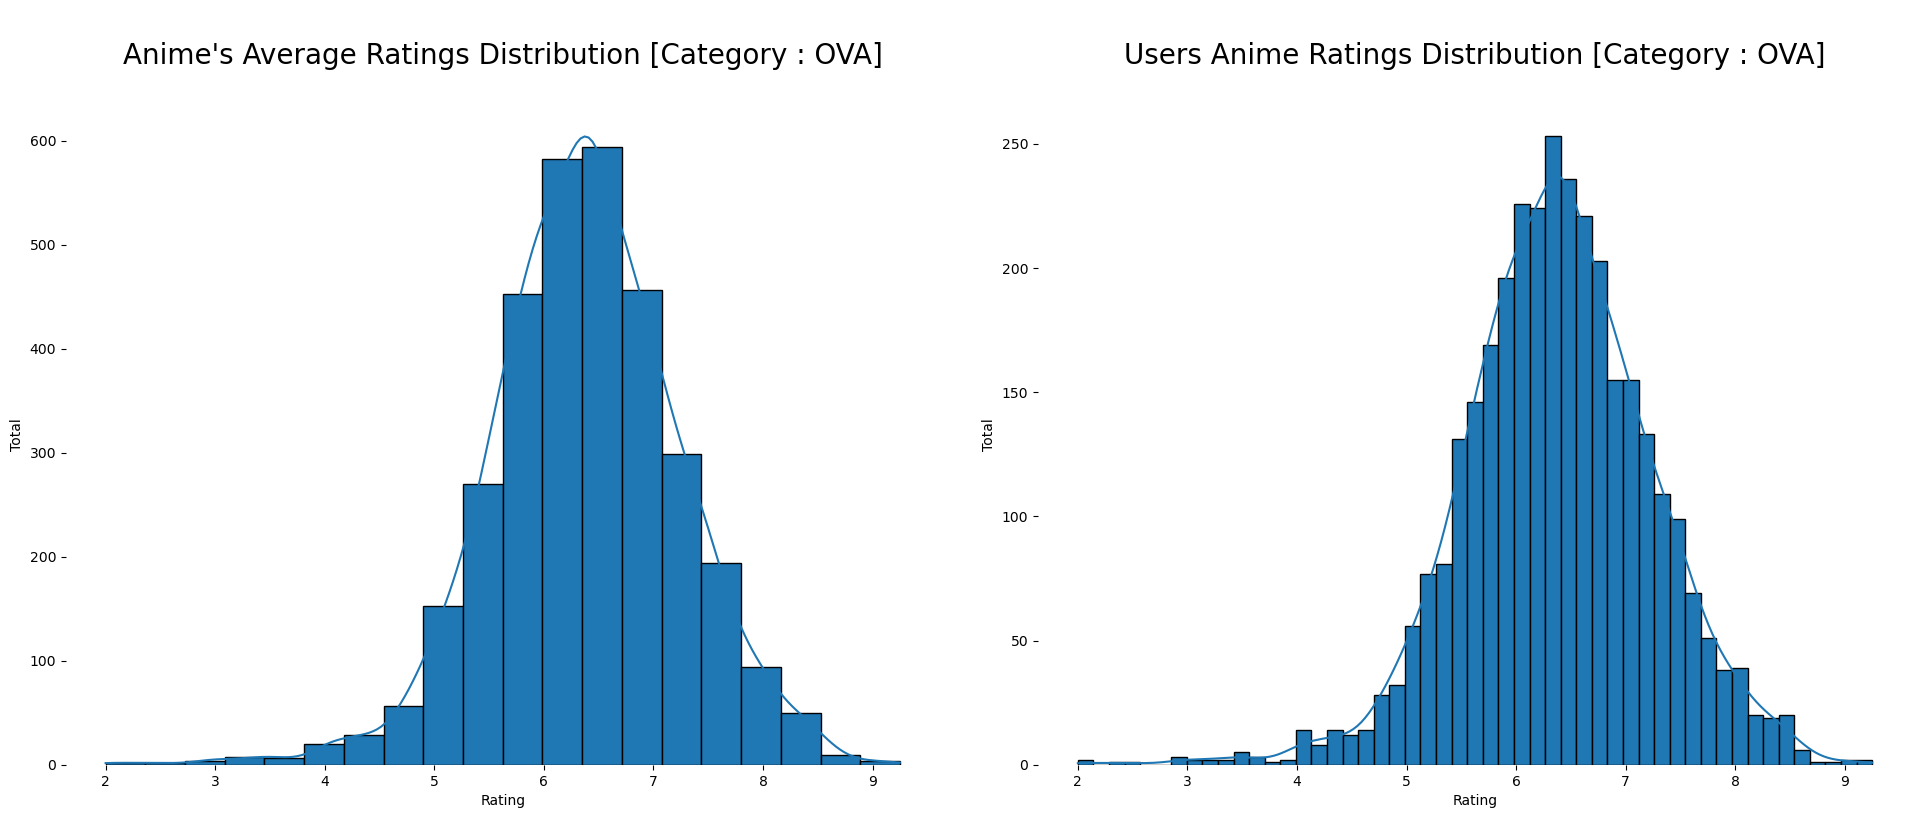

In [37]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(anime_df[anime_df["type"]=="OVA"]["rating"],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : OVA]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(anime_df[anime_df["type"]=="OVA"]["rating"],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : OVA]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

1. The majority of anime ratings are distributed within the range of 5.5 to 7.5, indicating that most anime tends to receive ratings in this range.

2. Users' ratings of anime are primarily spread between 5.5 and 10.0, suggesting that users generally rate anime across a wider range, including both moderate and higher ratings.

3. The mode, or the peak occurrence, of the users' ratings distribution is centered around 7.0 to 8.0. This indicates that a significant proportion of users tend to give ratings within this range, reflecting a common preference for moderately positive ratings.

4. Both the distribution are left skewed

In [ ]:
Anime category Movie

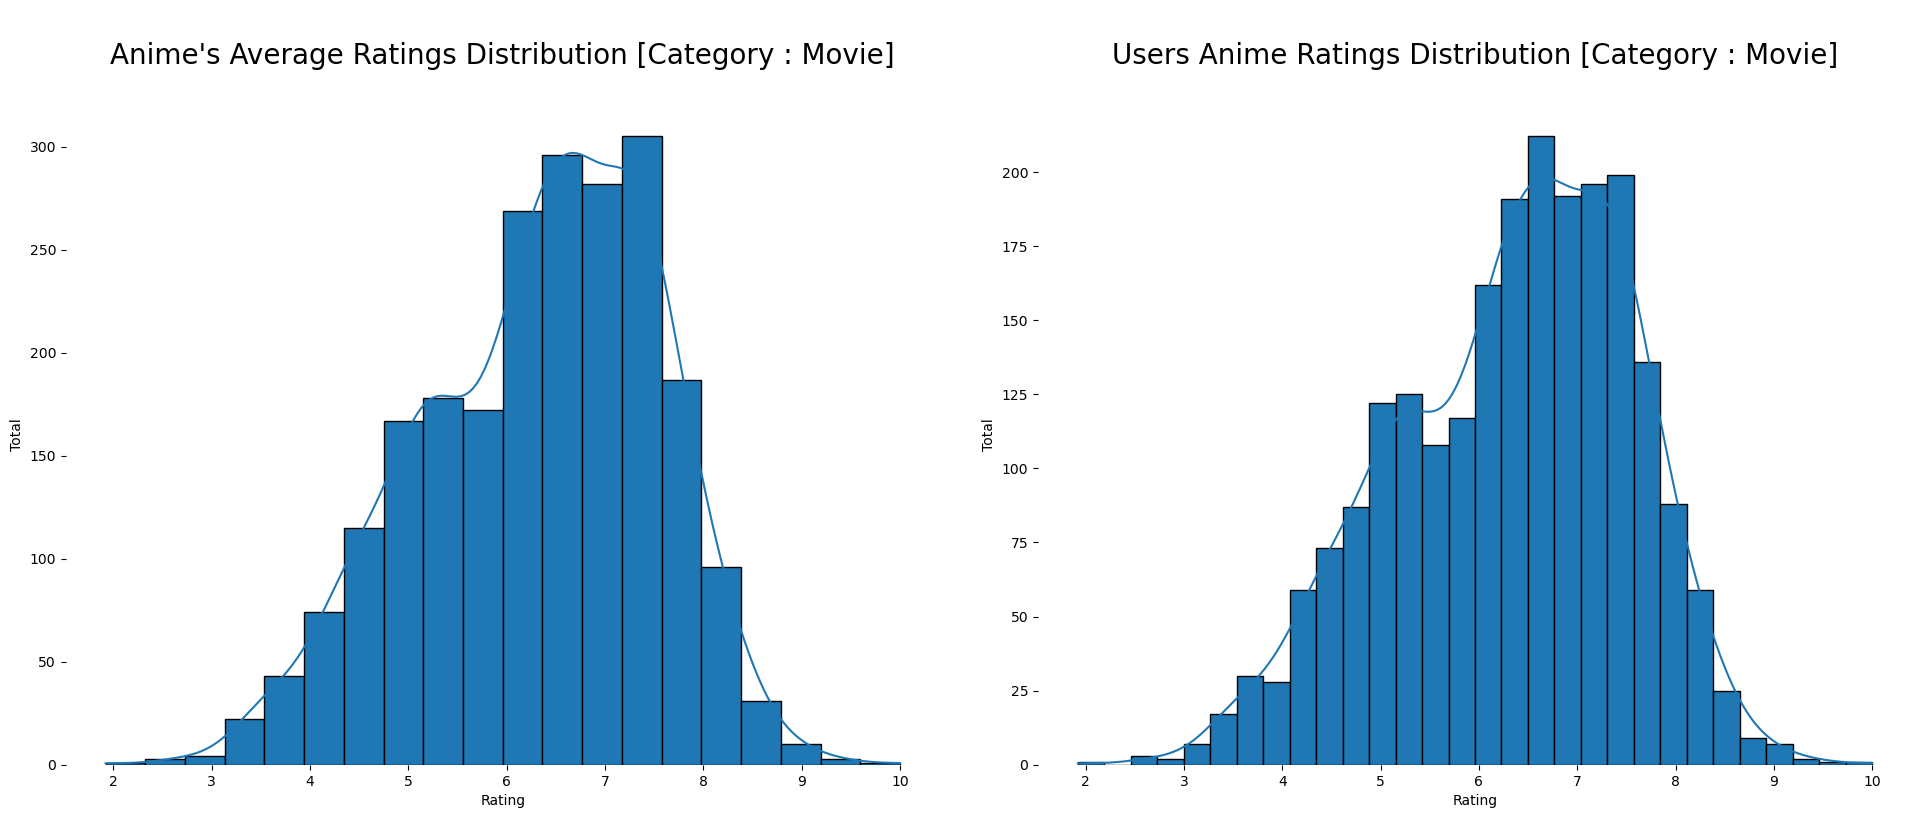

In [38]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(anime_df[anime_df["type"]=="Movie"]["rating"],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Movie]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(anime_df[anime_df["type"]=="Movie"]["rating"],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Movie]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

1. The majority of anime ratings are distributed across the range of 4.5 to 8.5, indicating that most anime receives ratings within this range.

2. Users' ratings of anime are spread between 5.0 and 10.0, suggesting that users generally provide a broader range of ratings, including both moderate and higher ratings.

3. The mode, representing the peak frequency, of the users' ratings distribution tends to center around 7.0 to 9.0. This indicates that a significant number of users tend to assign ratings within this range, reflecting a common preference for moderately positive to highly positive ratings.

4. Both the distribution are left skewed

Anime category Special

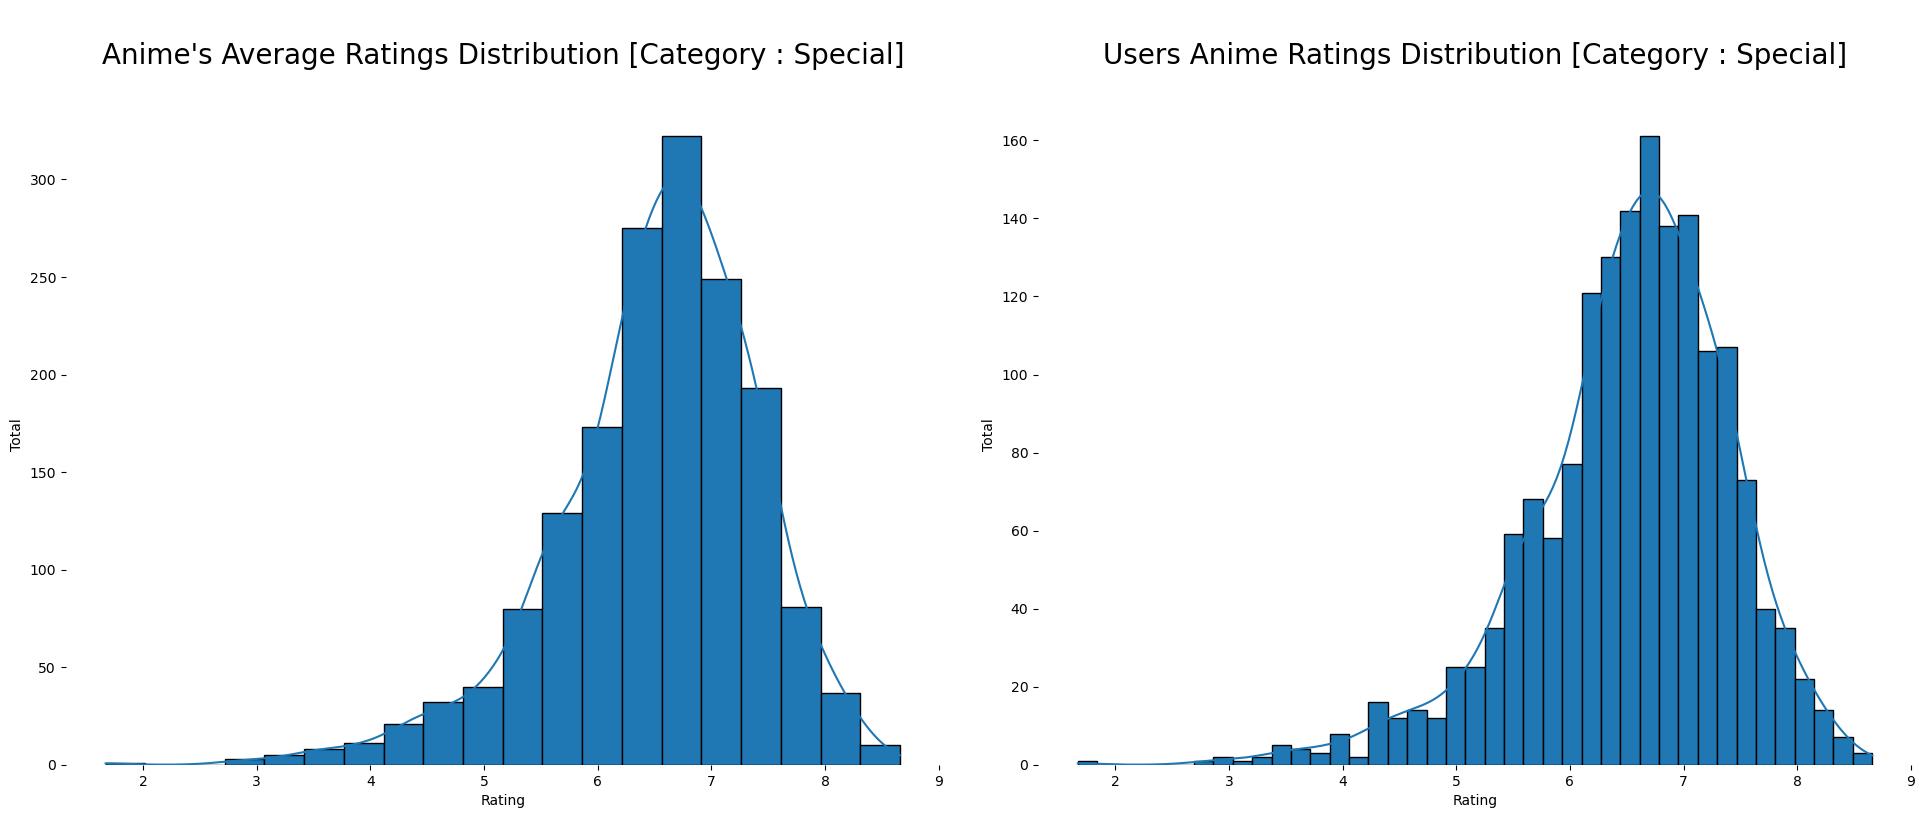

In [39]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(anime_df[anime_df["type"]=="Special"]["rating"],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Special]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(anime_df[anime_df["type"]=="Special"]["rating"],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Special]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

1. The majority of anime ratings are distributed within the range of 5.5 to 8.0, indicating that most anime tends to receive ratings in this moderate range.

2. Users' ratings of anime are predominantly spread between 5.0 and 10.0, suggesting that users provide a wide range of ratings, including both moderate and higher ratings.

3. The mode, representing the most frequently occurring range, of the users' ratings distribution is centered around 7.0 to 8.0. This indicates that a significant number of users tend to assign ratings within this range, reflecting a common preference for moderately positive ratings.

4. Both the distribution are left skewed

Anime Category ONA

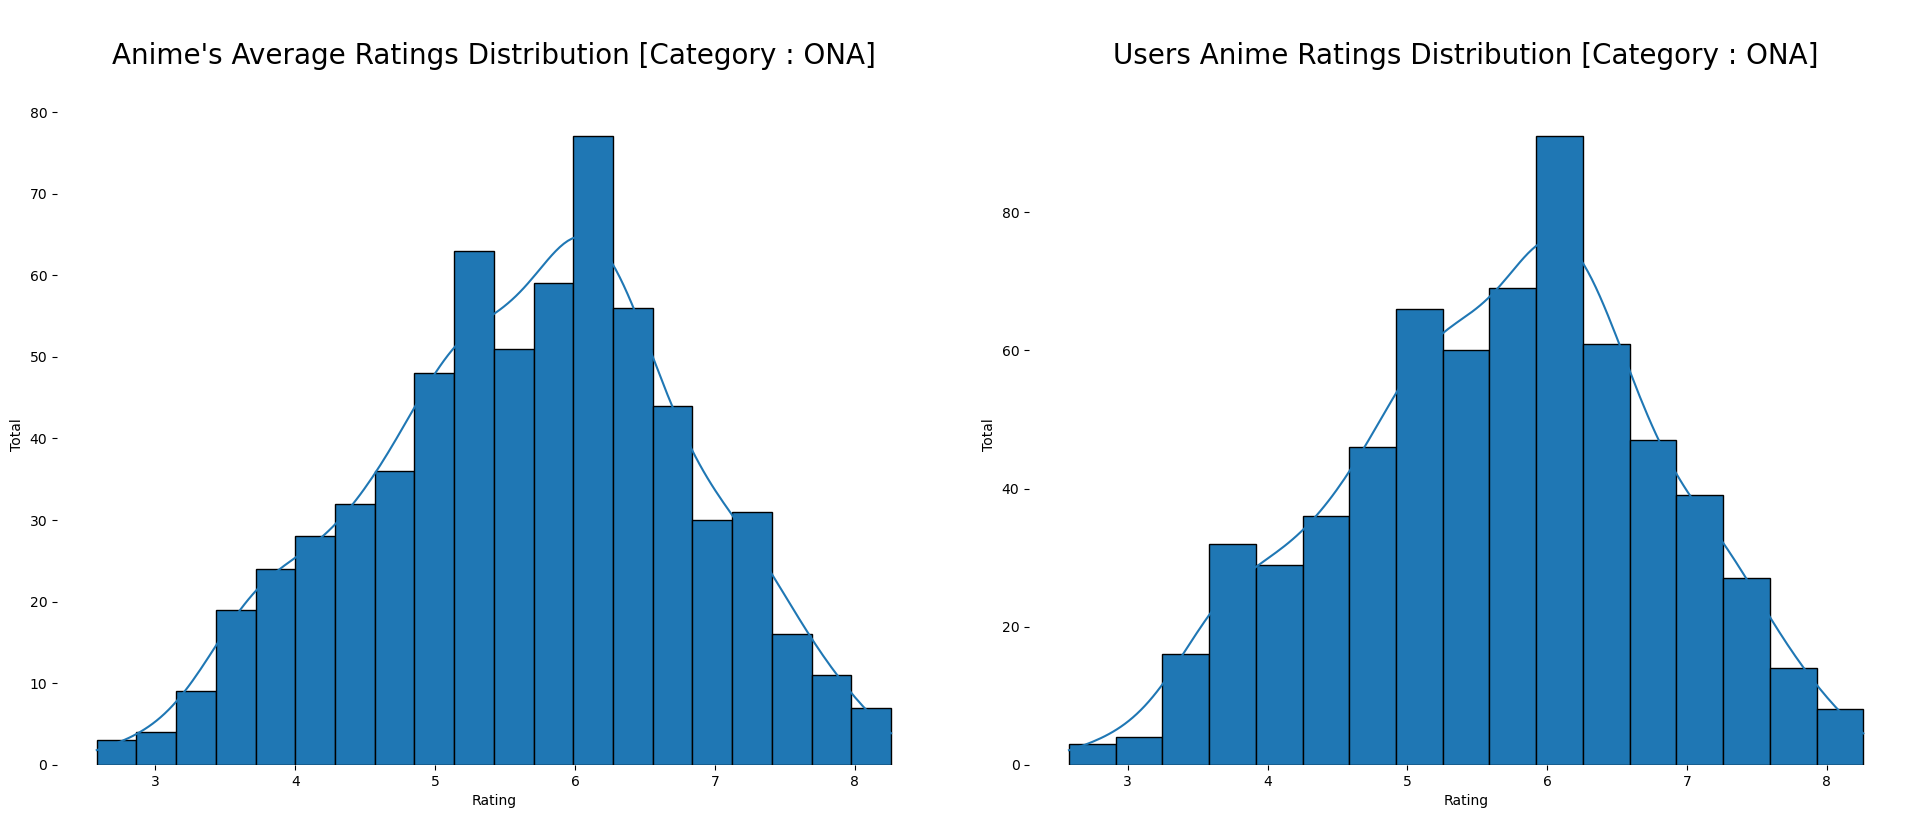

In [42]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(anime_df[anime_df["type"]=="ONA"]["rating"],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : ONA]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(anime_df[anime_df["type"]=="ONA"]["rating"],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : ONA]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

1. The majority of anime ratings fall within the range of 4.0 to 7.0, indicating that most anime tends to receive ratings in this moderate range.

2. Users' ratings of anime are primarily spread between 5.0 and 10.0, suggesting that users provide a broader range of ratings, including both moderate and higher ratings.

3. The mode, representing the most commonly occurring range, of the users' ratings distribution is centered around 7.0 to 8.0. This indicates that a significant number of users tend to assign ratings within this range, reflecting a common preference for moderately positive ratings.

4. Both the distribution are left skewed

Anime Category Music

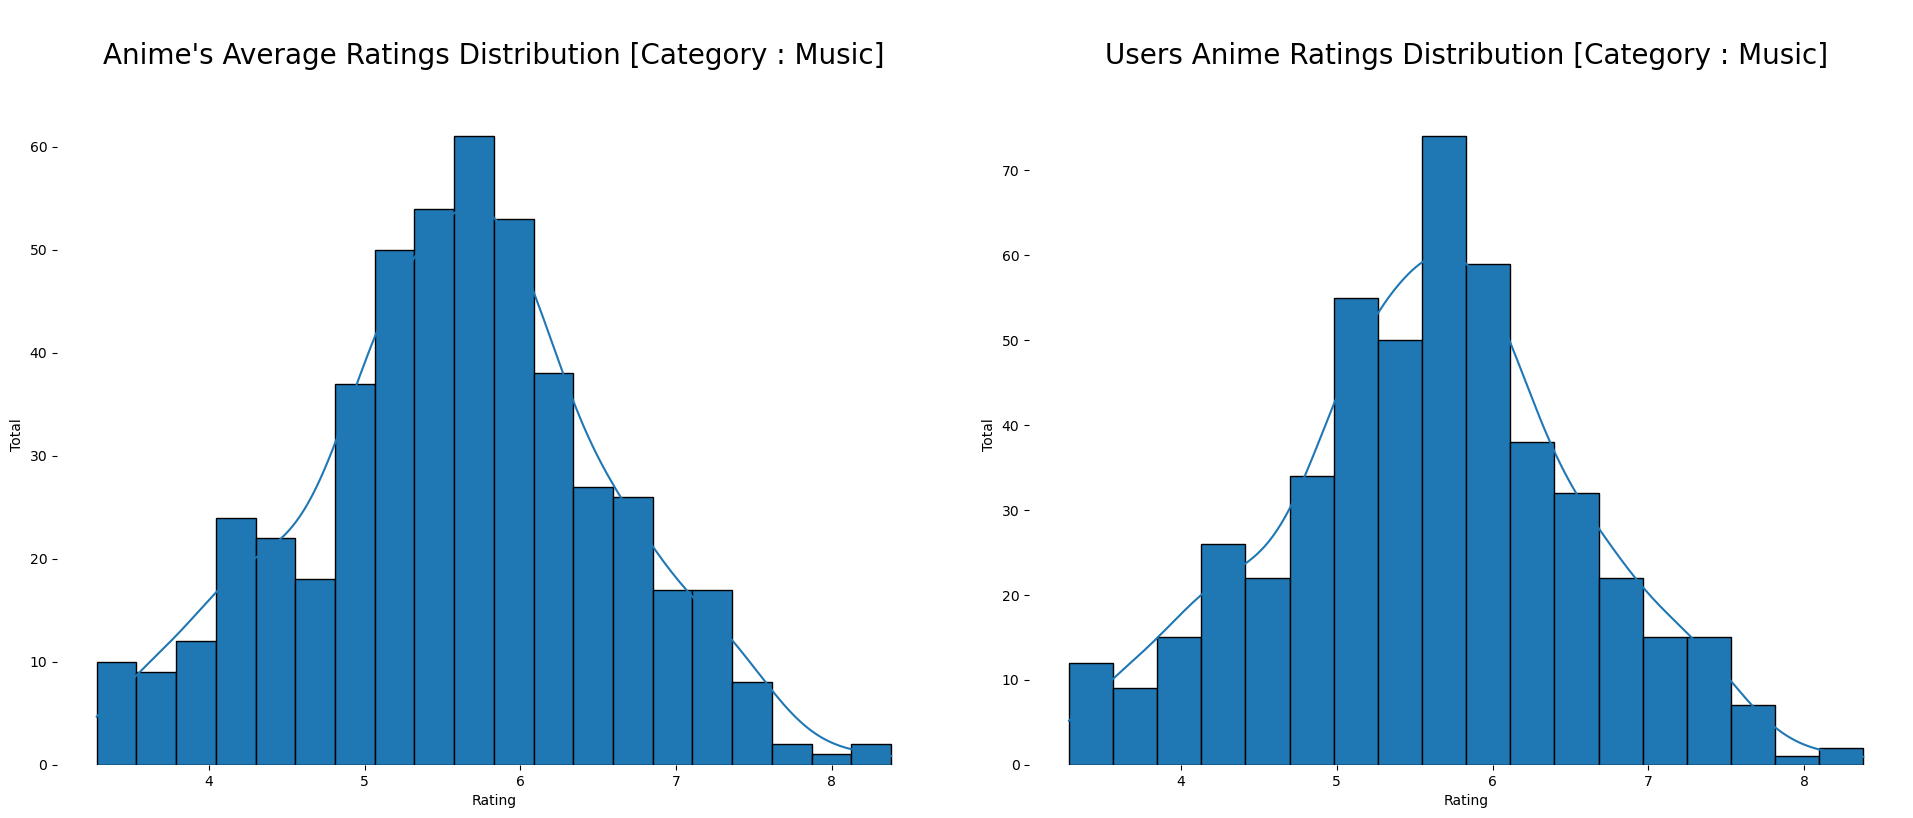

In [43]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(anime_df[anime_df["type"]=="Music"]["rating"],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Music]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(anime_df[anime_df["type"]=="Music"]["rating"],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Music]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

1. The majority of anime ratings are distributed within the range of 4.0 to 7.5, indicating that most anime tends to receive ratings within this moderate range.
2. Users' ratings of anime are predominantly spread between 5.0 and 10.0, suggesting that users provide a wide range of ratings, including both moderate and higher ratings.
3. The mode, representing the most frequently occurring range, of the users' ratings distribution is centered around 6.5 to 8.0. This indicates that a significant number of users tend to assign ratings within this range, reflecting a common preference for moderately positive ratings.